In [2]:
#visualize data
#convert data into binary

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris=datasets.load_iris()

In [5]:
xd,yt=iris.data[:100,:2],iris.target[:100]
print(xd.shape,yt.shape)

(100, 2) (100,)


In [6]:
indices = np.random.permutation(len(xd))
xd=xd[indices]
yt=yt[indices]

In [7]:
xtrain,xtest=xd[:80],xd[80:]
ytrain,ytest=yt[:80],yt[80:]

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return x*(1-x)

In [9]:
input_neuron=xd.shape[1]
output_neuron=1

w=np.random.uniform(size=(input_neuron,))
b= np.random.uniform(size=(output_neuron,))
print(w.shape,b.shape)

(2,) (1,)


In [10]:
for epoch in range(1000):
    
    for x,y in zip(xtrain,ytrain):
        
        out=sigmoid(np.dot(x,w)+b)
        dw = (out-y)*sigmoid_derivative(out)
        
        for i in range(len(w)):
            w[i] = w[i] - (0.01*dw*x[i])
        for i in range(len(b)):
            b[i] = b[i] - (0.01*dw)

In [11]:
output=[]
for x in xtest:
    
    x=x.reshape((1,input_neuron))
    out=sigmoid(np.dot(x,w)+b).reshape(1)
    if(out>0.5):
        output.append(1)
    else:
        output.append(0)
print(ytest.ravel(),output)

[1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0] [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [16]:
w1=w[0]
w2=w[1]
print(w1,w2)

2.9513942643112934 -4.920761221935741


In [39]:
x1=xtrain[:,0]
x2=[(-i*(w1/w2)) for i in x1]

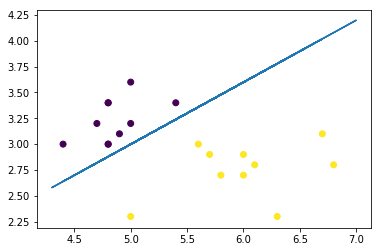

In [40]:
plt.figure()
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)

plt.plot(x1,x2)
plt.show()